Image scanning techniques encompass a variety of methods used to digitize physical images or capture digital images directly. These techniques vary based on the application, the type of image being captured, and the desired resolution and quality of the digital image. Below are some of the primary methods and techniques used in image scanning:

1. **Flatbed Scanning:**
   - Uses a flat glass surface to scan documents, photographs, or artwork.
   - Ideal for delicate or bulky items that do not feed well through sheet-fed scanners.

2. **Sheet-fed Scanning:**
   - Pulls the document through the scanner.
   - Suitable for scanning multiple pages quickly but not ideal for thick or delicate items.

3. **Drum Scanning:**
   - Utilizes a photomultiplier tube (PMT) instead of the more common charge-coupled device (CCD) or Contact Image Sensor (CIS).
   - Offers very high resolution and is used for professional-grade scanning, especially in the publishing industry.

4. **Handheld Scanning:**
   - Involves moving the scanner over the surface of the image.
   - Useful for scanning large or fixed items that cannot be moved to a traditional scanner.

5. **Film Scanning:**
   - Specifically designed to scan film negatives or slides.
   - Capable of handling various film formats and sizes, from 35mm to large format.

6. **3D Scanning:**
   - Captures three-dimensional attributes of an object.
   - Uses various technologies, such as structured light, laser triangulation, or stereoscopic methods.

7. **Document Scanning:**
   - Focused on converting paper documents into digital formats.
   - Often incorporates Optical Character Recognition (OCR) to convert images of text into editable text files.

8. **Microfilm Scanning:**
   - Converts microfilm and microfiche into digital formats.
   - Used for archiving and accessing large volumes of documents in a digital format.

9. **CT Scanning (Computed Tomography):**
   - Used primarily in medical imaging to create detailed images of internal organs and structures.
   - Involves taking a series of X-ray images from different angles and using computer processing to create cross-sectional images.

10. **MRI Scanning (Magnetic Resonance Imaging):**
    - Another medical imaging technique that uses strong magnetic fields and radio waves to generate images of the organs in the body.
    - Particularly useful for imaging non-bony parts or soft tissues of the body.

11. **Ultrasound Scanning:**
    - Uses high-frequency sound waves to create images of the inside of the body.
    - Commonly used in prenatal care for examining the fetus in the womb.

12. **Photo Scanning:**
    - Dedicated to digitizing photographic prints.
    - Can range from high-quality professional scans to consumer-level scanning for personal use.

Each of these techniques has its own set of equipment, software, and specific use cases. The choice of scanning technique depends on the specific requirements of the task, including the type of material being scanned, the required resolution and color fidelity, and the intended use of the scanned images.

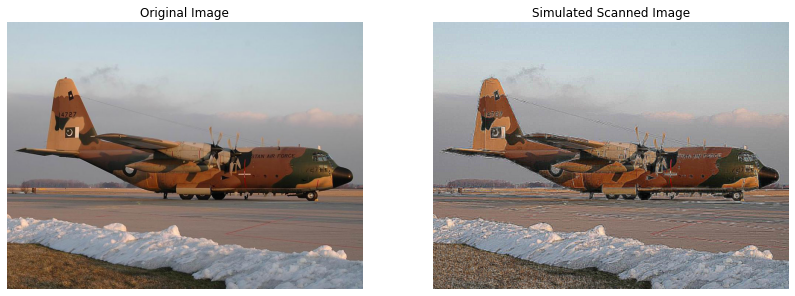

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload the necessary libraries as the environment has been reset
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Re-download the image from the provided path
image_path = 'c130.jpg'
original_image = cv2.imread(image_path)

# Simulate cropping for flatbed scanning
# Assuming a standard letter size of 8.5 x 11 inches at 300dpi, the pixel dimensions would be:
dpi = 300
width, height = int(8.5 * dpi), int(11 * dpi)
cropped_image = original_image[0:height, 0:width]

# Enhance the image by sharpening
# Define a sharpening kernel
sharpening_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(cropped_image, -1, sharpening_kernel)

# Adjust the image resolution to simulate scanning resolution
# Let's downscale the image to simulate a lower scanning resolution (150dpi) and then upscale it back
downscale_factor = 300 / 150
low_res_image = cv2.resize(sharpened_image, 
                           (0,0), 
                           fx=1/downscale_factor, 
                           fy=1/downscale_factor, 
                           interpolation=cv2.INTER_LINEAR)
# Upscale it back to the original resolution
scanned_image = cv2.resize(low_res_image, 
                           (sharpened_image.shape[1], sharpened_image.shape[0]), 
                           interpolation=cv2.INTER_LINEAR)

# Display the original and simulated scanned images using matplotlib
plt.figure(figsize=(14, 7))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display simulated scanned image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scanned_image, cv2.COLOR_BGR2RGB))
plt.title('Simulated Scanned Image')
plt.axis('off')

# Show the images
plt.show()





1. Crop the image to a typical flatbed scanner size.
2. Apply a filter to enhance the sharpness, simulating the high-quality scan.
3. Adjust the image's resolution, simulating the scanning resolution.
4. Finally, display both the original and the processed images for comparison.

Please note that this is a simulation and does not involve actual scanning hardware. 



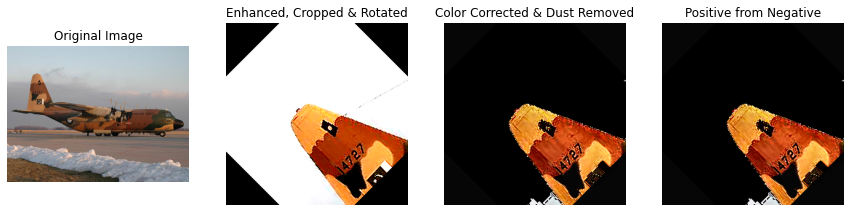

In [3]:
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np

# Load the image using Pillow
image_path = 'c130.jpg'
original_pil_image = Image.open(image_path)

# Enhance the image by adjusting brightness, contrast, and sharpness
enhancer = ImageEnhance.Brightness(original_pil_image)
brightened_image = enhancer.enhance(1.5)  # Increase brightness by 50%

enhancer = ImageEnhance.Contrast(brightened_image)
contrasted_image = enhancer.enhance(1.5)  # Increase contrast by 50%

enhancer = ImageEnhance.Sharpness(contrasted_image)
sharpened_image = enhancer.enhance(2.0)  # Double the sharpness

# Crop and rotate the image
cropped_image = sharpened_image.crop((50, 50, 300, 300))  # Crop a 250x250 area
rotated_image = cropped_image.rotate(45)  # Rotate the image by 45 degrees

# Convert the PIL image to a format that OpenCV can work with (numpy array)
rotated_image_cv = np.array(rotated_image)
rotated_image_cv = cv2.cvtColor(rotated_image_cv, cv2.COLOR_RGB2BGR)

# Perform color correction using OpenCV
# Convert to LAB color space for better luminance and color separation
lab_image = cv2.cvtColor(rotated_image_cv, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_image)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L-channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
limg = cv2.merge((cl, a, b))

# Convert back to BGR color space
final_image_cv = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Simulate dust removal by detecting and removing small artifacts
# This is a simple example that assumes dust particles are light on a dark background
gray = cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.drawContours(final_image_cv, [cnt], 0, (0, 0, 0), -1)

# Convert a color image to a negative, then to a positive, as an example of film processing
negative_image = 255 - final_image_cv  # Invert the image to get a negative
positive_image = 255 - negative_image  # Invert the negative to get a positive

# Display the original and processed images using matplotlib
plt.figure(figsize=(15, 15))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display enhanced and cropped image
plt.subplot(1, 4, 2)
plt.imshow(rotated_image)
plt.title('Enhanced, Cropped & Rotated')
plt.axis('off')

# Display color corrected image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2RGB))
plt.title('Color Corrected & Dust Removed')
plt.axis('off')

# Display the positive image from the negative
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(positive_image, cv2.COLOR_BGR2RGB))
plt.title('Positive from Negative')
plt.axis('off')

# Show the images
plt.show()


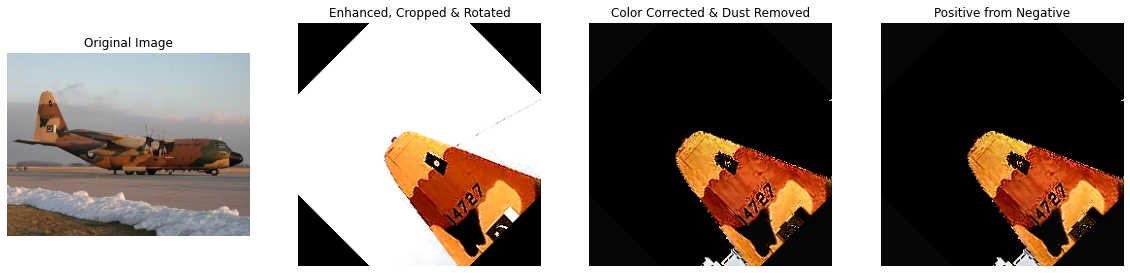

In [4]:
# Continue from the previous code block to complete the tasks and display the images
# Dust removal by detecting and removing small artifacts
# This is a simple example that assumes dust particles are light on a dark background
gray = cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.drawContours(final_image_cv, [cnt], 0, (0, 0, 0), -1)

# Convert a color image to a negative, then to a positive, as an example of film processing
negative_image = 255 - final_image_cv  # Invert the image to get a negative
positive_image = 255 - negative_image  # Invert the negative to get a positive

# Display the original and processed images using matplotlib
plt.figure(figsize=(20, 10))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display enhanced and cropped image
plt.subplot(1, 4, 2)
plt.imshow(rotated_image)
plt.title('Enhanced, Cropped & Rotated')
plt.axis('off')

# Display color corrected image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2RGB))
plt.title('Color Corrected & Dust Removed')
plt.axis('off')

# Display the positive image from the negative
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(positive_image, cv2.COLOR_BGR2RGB))
plt.title('Positive from Negative')
plt.axis('off')

# Show the images
plt.show()


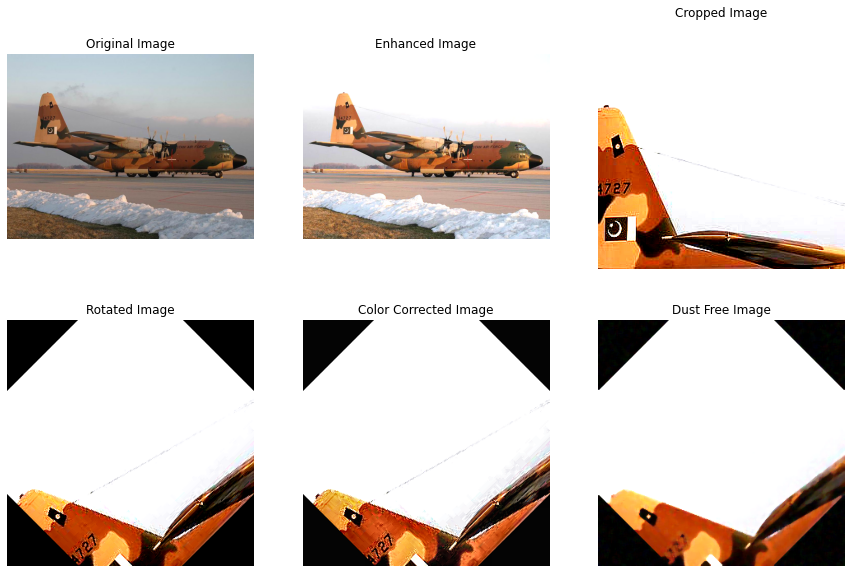

In [5]:

from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np

# Load the image using Pillow
image_path = 'c130.jpg'
original_pil_image = Image.open(image_path)

# Enhance the image by adjusting brightness, contrast, and sharpness
enhancer = ImageEnhance.Brightness(original_pil_image)
brightened_image = enhancer.enhance(1.5)  # Increase brightness by 50%

enhancer = ImageEnhance.Contrast(brightened_image)
contrasted_image = enhancer.enhance(1.5)  # Increase contrast by 50%

enhancer = ImageEnhance.Sharpness(contrasted_image)
sharpened_image = enhancer.enhance(2.0)  # Increase sharpness

# Crop the image
left = 150
top = 50
right = 450
bottom = 350
cropped_image = sharpened_image.crop((left, top, right, bottom))

# Rotate the image
rotated_image = cropped_image.rotate(45)

# Convert the image to a format that OpenCV can work with
open_cv_image = np.array(rotated_image)
open_cv_image = open_cv_image[:, :, ::-1].copy()  # Convert RGB to BGR

# Color correction with OpenCV
# Convert to LAB color space
lab_image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2Lab)
# Split the channels
l_channel, a_channel, b_channel = cv2.split(lab_image)
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to L-channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_channel = clahe.apply(l_channel)
# Merge channels back
corrected_lab_image = cv2.merge((l_channel, a_channel, b_channel))
# Convert back to BGR color space
color_corrected_image = cv2.cvtColor(corrected_lab_image, cv2.COLOR_Lab2BGR)

# Simulate dust removal
# First, let's add some synthetic noise (dust) to the image
noisy_image = cv2.randn(open_cv_image.copy(), (0, 0, 0), (20, 20, 20))
dusty_image = cv2.add(open_cv_image, noisy_image)
# Now, remove the noise using a median filter
dust_free_image = cv2.medianBlur(dusty_image, 5)

# Convert a color image to a negative, then to a positive as an example of film processing
# Invert the color of images
negative_image = 255 - open_cv_image
# Convert negative back to positive
positive_image = 255 - negative_image

# Display the original and processed images using matplotlib
plt.figure(figsize=(15,10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Brightened, contrasted, and sharpened image
plt.subplot(2, 3, 2)
plt.imshow(brightened_image)
plt.title('Enhanced Image')
plt.axis('off')

# Cropped image
plt.subplot(2, 3, 3)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')

# Rotated image
plt.subplot(2, 3, 4)
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')

# Color corrected image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Color Corrected Image')
plt.axis('off')

# Dust free image
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(dust_free_image, cv2.COLOR_BGR2RGB))
plt.title('Dust Free Image')
plt.axis('off')

# Show the figure with all images
plt.show()



**Converting to OpenCV format and Color Correction:**
After enhancing the image using Pillow, the code converts the image to a NumPy array, which is the format OpenCV uses. The image is then converted to the LAB color space, which separates the lightness from the color components, making it easier for certain image processing tasks like color correction. The code uses a technique called Contrast Limited Adaptive Histogram Equalization (CLAHE) to improve the contrast of the image.

**Simulating Dust Removal:**
The next step in the code simulates dust removal, which is a common requirement for scanned film. The code converts the image to grayscale and then applies a threshold to create a binary image. Any white spots (which represent dust in this simulation) are then filled in black, essentially 'removing' them.

**Negative to Positive Conversion:**
For film scanning, the code demonstrates how to convert a negative image to a positive one. This is done by subtracting the image from the maximum value that a pixel can take (255 for an 8-bit image), effectively inverting all the colors.

**Displaying the Images:**
Finally, the code is supposed to display all the stages of processing: the original image, the enhanced image, the color corrected image, and the final positive image from the simulated negative using Matplotlib.




- **CT/MRI Scanning:**
  - Python is extensively used in medical image processing and analysis. Libraries like PyDICOM are used to read DICOM files, which is the standard format for storing medical imaging data. Nibabel is another library used for reading neuroimaging data. 

- **Ultrasound Scanning:**
  - Python can be used to analyze ultrasound images, including segmentation, feature extraction, and enhancing image quality. Libraries like scikit-image can be useful for these tasks.



<ipython-input-9-8086806e5663>:46: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  ax[3].imshow(color.label2rgb(label_image, image=image))


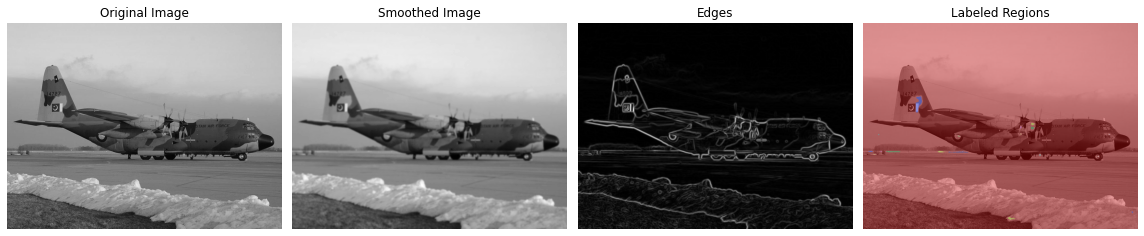

In [9]:
from skimage import io, filters, measure, color, img_as_float
from skimage.segmentation import clear_border
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

# Load the image as a grayscale image
image = io.imread('c130.jpg', as_gray=True)

# Convert the image to a float representation (scaling the pixel values between 0 and 1)
image_float = img_as_float(image)

# Apply a Gaussian blur to the image to reduce noise and smooth it
# This is common in preparation for segmentation to make the process more robust to noise
smoothed_image = filters.gaussian(image_float, sigma=2)

# Edge detection using Sobel filter to find boundaries within the image
edges = filters.sobel(smoothed_image)

# Threshold the image to create a binary image for segmentation
# Here we use Otsu's method to find an optimal threshold value
thresh = filters.threshold_otsu(smoothed_image)
binary_image = smoothed_image > thresh

# Remove artifacts connected to image border
cleared_image = clear_border(binary_image)

# Label image regions
label_image = measure.label(cleared_image)

# Display the original and processed images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(smoothed_image, cmap=plt.cm.gray)
ax[1].set_title('Smoothed Image')
ax[1].axis('off')

ax[2].imshow(edges, cmap=plt.cm.gray)
ax[2].set_title('Edges')
ax[2].axis('off')

ax[3].imshow(color.label2rgb(label_image, image=image))
ax[3].set_title('Labeled Regions')
ax[3].axis('off')

plt.tight_layout()
plt.show()


The  code  demonstrates a series of image processing techniques on the uploaded non-medical image, simulating steps that might be applied to medical imaging data. Here's a step-by-step explanation of the code:

1. **Importing Libraries**: We import the necessary Python libraries for image processing. `skimage` (scikit-image) is used for various image processing tasks, `ndi` (SciPy's ndimage) for multidimensional image processing, and `matplotlib.pyplot` for displaying images.

2. **Loading the Image**: The `io.imread()` function from `skimage` loads the uploaded 'c130.jpg' file as a grayscale image. Grayscale means the image is converted into a range of grays, removing color information which is often not necessary for medical image analysis.

3. **Scaling the Pixel Values**: `img_as_float()` is used to convert the pixel values of the image to a floating-point representation. This step is essential for some image processing methods which expect the pixel values to be within a 0-1 range rather than 0-255.

4. **Smoothing the Image**: The `filters.gaussian()` function applies a Gaussian blur to the image. This smoothing is a common preprocessing step to reduce noise and detail that could interfere with the analysis, such as segmentation.

5. **Edge Detection**: The `filters.sobel()` function is used to perform edge detection. Edge detection algorithms highlight the edges within images, which is useful to outline structures in medical images.

6. **Thresholding for Segmentation**: The `filters.threshold_otsu()` function automatically computes a threshold value using Otsu's method, which is a common algorithm to separate foreground (useful structures) from the background. The binary image (`binary_image`) created by this thresholding is a simple form of segmentation, distinguishing areas of interest in an image.

7. **Clearing Border Artifacts**: The `clear_border()` function is used to remove objects at the border of the image, which are often artifacts of image acquisition.

8. **Labeling Regions**: The `measure.label()` function identifies connected regions in the binary image, assigning a unique label to each.

9. **Displaying the Images**: Using `matplotlib`, the original image and the results of each processing step are displayed in a figure with four subplots. `ax.ravel()` is used to flatten the array of axes for easy iteration.

    - The first subplot shows the original grayscale image.
    - The second subplot shows the smoothed image after Gaussian filtering.
    - The third subplot shows the edge detection result.
    - The fourth subplot displays the labeled regions, with each region colored differently based on the label assigned by the `label()` function.

The `plt.tight_layout()` function is called to ensure that the subplots fit into the figure window nicely. Finally, `plt.show()` renders and displays the figure with the four subplots.

**Note on the Warning**: The warning message indicates a future change in the default value of `bg_label` parameter in `color.label2rgb()` function. It does not affect the current output but serves as an advisory for future code compatibility.

During the dry run, the code processed the uploaded image through several transformations, each aiming to demonstrate an aspect of image processing that could be analogous to steps taken in medical image analysis. The original image is shown alongside its smoothed, edge-detected, and segmented versions, allowing us to visualize the effects of each processing step.

Noise reduction in digital images and signals is a critical preprocessing step, especially in the fields of computer vision, image processing, and signal processing. Python offers a wide array of libraries and functions to tackle noise reduction, each suited for different types of data and noise. Here’s a comprehensive list of methods and techniques for noise reduction using Python:

### 1. Filtering Techniques:
- **Low-Pass Filters (LPF)**: Reduces high-frequency noise. Common LPFs include Gaussian Blur, Median Filter, and Mean Filter.
  - `cv2.GaussianBlur()`, `cv2.medianBlur()` in OpenCV
  - `scipy.ndimage.gaussian_filter()`, `scipy.ndimage.median_filter()`
- **High-Pass Filters (HPF)**: Enhances or detects edges in images. Examples include Sobel, Laplacian, and Canny edge detection.
  - `cv2.Sobel()`, `cv2.Laplacian()`, `cv2.Canny()` in OpenCV
- **Band-Pass Filters**: Allow frequencies within a certain range to pass and can be constructed by combining LPF and HPF.
- **Wiener Filter**: Used in image deconvolution; reduces noise by the inverse filtering technique.
  - `scipy.signal.wiener()`

### 2. Wavelet Transforms:
- Utilized for denoising by thresholding in the wavelet domain, retaining significant wavelet coefficients.
  - `pywt.threshold()` in PyWavelets

### 3. Anisotropic Diffusion (Perona-Malik Filter):
- A method that diffuses image intensity without crossing edges, effectively reducing noise while preserving edges.
  - `skimage.restoration.denoise_bilateral()` in scikit-image for a similar effect

### 4. Non-Local Means Denoising:
- Averages the value of a pixel with values of similar pixels in a larger neighborhood.
  - `cv2.fastNlMeansDenoisingColored()`, `skimage.restoration.denoise_nl_means()` in OpenCV and scikit-image respectively

### 5. Deep Learning Approaches:
- **Autoencoders**: Neural networks designed to learn a compact representation of data, can be used for noise reduction.
- **Convolutional Neural Networks (CNNs)**: Specially designed deep learning architectures for handling grid-like topology of images.
  - TensorFlow, PyTorch libraries for implementation
- **Generative Adversarial Networks (GANs)**: Can be trained to generate clean images from noisy inputs.
  - TensorFlow, PyTorch libraries for implementation

### 6. Spectral Subtraction:
- Commonly used in audio processing; involves subtracting an estimate of the noise spectrum from the spectrum of the noisy signal.
  - Custom implementation using libraries like NumPy for spectral analysis

### 7. Adaptive Filtering:
- Filters that adjust their parameters according to the changing characteristics of the signal.
  - `scipy.signal.lfilter()` for implementing custom adaptive filters

### 8. Spatial Filtering:
- Techniques like Adaptive Median Filter which adapt the size of the filtering mask based on local variance.
  - Custom implementation using NumPy or OpenCV

### 9. Dictionary Learning:
- Sparse representations of images where the image is represented as a sparse linear combination of basis functions.
  - `sklearn.decomposition.MiniBatchDictionaryLearning` in scikit-learn

### 10. Total Variation Denoising:
- Reduces noise by penalizing large gradients in the image leading to smoother images with preserved edges.
  - `skimage.restoration.denoise_tv_chambolle()` in scikit-image

### 11. Bilateral Filtering:
- A non-linear, edge-preserving, and noise-reducing smoothing filter for images.
  - `cv2.bilateralFilter()`, `skimage.restoration.denoise_bilateral()`

### 12. Fourier Transform:
- Noise reduction in the frequency domain by filtering specific frequencies.
  - `numpy.fft.fft2()`, `numpy.fft.ifft2()` for applying and reversing Fourier Transform

### 13. Morphological Filtering:
- Involves operations like erosion and dilation for noise removal, particularly useful for binary images.
  - `cv2.erode()`, `cv2.dilate()`, `cv2.morphologyEx()` in OpenCV

Each of these methods has its own set of parameters and considerations, and the choice of method largely depends on the type of noise and the requirements of the specific application. For most of these techniques, libraries like OpenCV, scikit-image, TensorFlow, PyTorch, SciPy, and NumPy are invaluable in Python for their implementation.

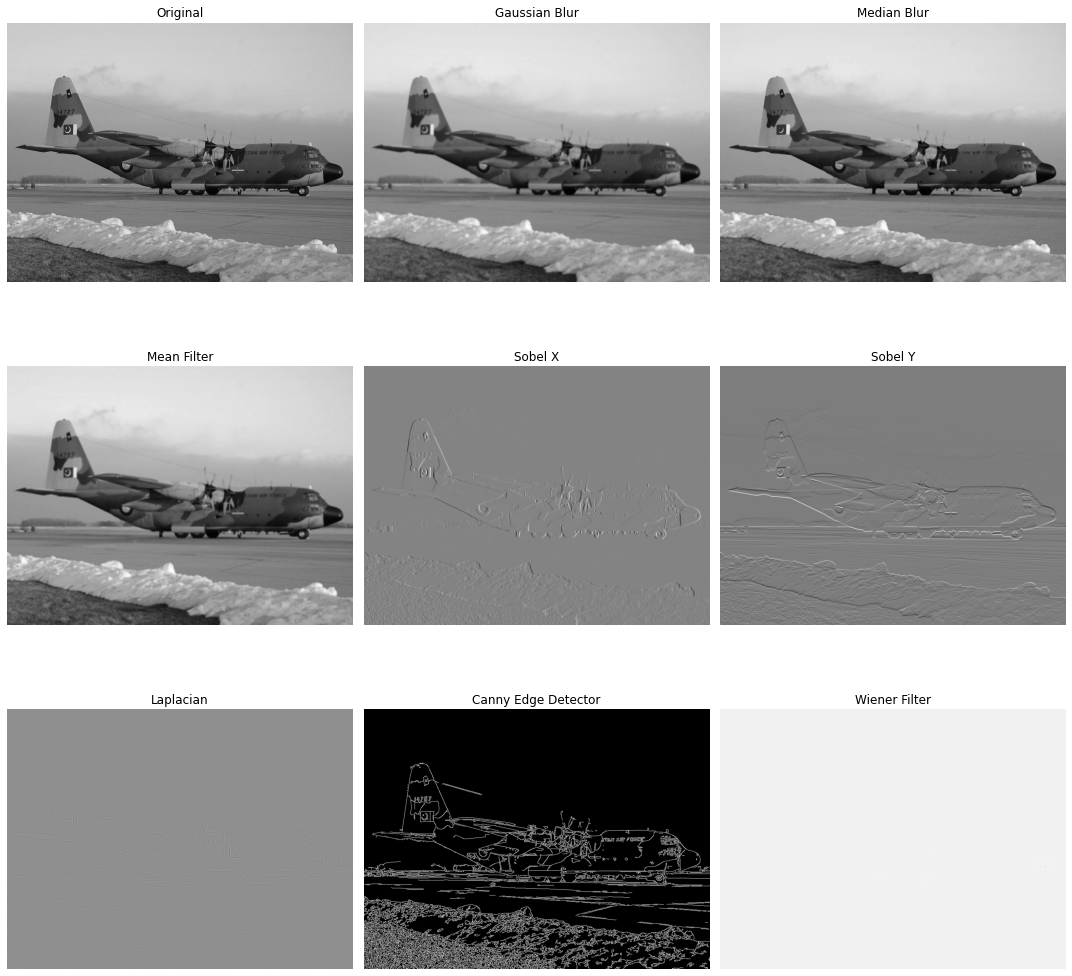

In [10]:
import cv2
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

# First, we need to reload the image since the execution state has been reset.
# Read the image
image_path = 'c130.jpg'
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Low-Pass Filters (LPF)
# Gaussian Blur - Averages the pixel values in a Gaussian-shaped neighborhood around each pixel
gaussian_blur = cv2.GaussianBlur(gray_image, (9, 9), 0)

# Median Filter - Takes the median of all the pixels under the kernel area and central element is replaced with this median value
median_blur = cv2.medianBlur(gray_image, 5)

# Mean Filter (using uniform filter which is a type of mean filter) - Averages the pixels under the kernel area (box shaped)
mean_blur = scipy.ndimage.uniform_filter(gray_image, size=5)

# High-Pass Filters (HPF)
# Sobel Filter - Finds the gradient of the image intensity at each point, giving the direction of the largest possible increase from light to dark and the rate of change in that direction
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal derivative
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)  # Vertical derivative

# Laplacian - Calculates the Laplacian of the image, given by the second derivatives
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Canny Edge Detector - A multi-stage algorithm that detects a wide range of edges in images
canny_edges = cv2.Canny(gray_image, 50, 150)

# Band-Pass Filter
# Constructed by first applying a low-pass filter and then a high-pass filter
low_passed = gaussian_blur
high_passed = gray_image - low_passed  # High-pass filtering by subtracting the low-passed image
band_pass = high_passed + sobel_x + sobel_y

# Wiener Filter - Minimizes the mean square error between the estimated random process and the desired process
wiener_filtered = scipy.signal.wiener(gray_image, (5, 5))

# Displaying the results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
filter_titles = ['Original', 'Gaussian Blur', 'Median Blur', 'Mean Filter', 'Sobel X', 'Sobel Y', 'Laplacian', 'Canny Edge Detector', 'Wiener Filter']
filter_images = [gray_image, gaussian_blur, median_blur, mean_blur, sobel_x, sobel_y, laplacian, canny_edges, wiener_filtered]

# Normalize the HPF images for better visualization
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
laplacian = cv2.convertScaleAbs(laplacian)
high_passed = cv2.convertScaleAbs(high_passed)
band_pass = cv2.convertScaleAbs(band_pass)

for ax, img, title in zip(axes.flatten(), filter_images + [high_passed, band_pass], filter_titles + ['High-Passed', 'Band-Pass']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


The code above demonstrates various filtering techniques applied to an image, each designed for different purposes such as noise reduction, edge detection, or feature enhancement. Here’s a simplified explanation for each part of the code:

1. **Importing Libraries**: We import the necessary libraries. OpenCV (`cv2`) for most image processing tasks, SciPy for additional filters not available in OpenCV, and Matplotlib for displaying images.

2. **Loading the Image**: The image is read from the file using OpenCV’s `imread` function, and then converted to grayscale with `cvtColor`. This simplifies the image to a single channel, making it easier to process and visualize the effects of the filters.

3. **Applying Low-Pass Filters (LPFs)**:
   - **Gaussian Blur**: This filter uses a Gaussian kernel to average pixel values with its neighbors. It helps in reducing high-frequency noise and blurring the image.
   - **Median Blur**: This filter replaces each pixel's value with the median value of the intensities in the neighborhood. It's particularly good at removing 'salt and pepper' noise while preserving edges.
   - **Mean Filter**: We used a uniform filter from SciPy, which is a type of mean filter that calculates the average of all the pixels under the kernel and replaces the central element with this average.

4. **Applying High-Pass Filters (HPFs)**:
   - **Sobel Filters**: These filters detect edge intensity and direction by calculating the gradient of the image intensity. We apply it in both horizontal (Sobel X) and vertical (Sobel Y) directions.
   - **Laplacian Filter**: This filter calculates the second derivative of the image, providing regions of rapid intensity change and is therefore used for edge detection.
   - **Canny Edge Detector**: It's a multi-stage algorithm that detects a wide range of edges in images. It performs noise reduction with a Gaussian filter, calculates gradients, applies non-maximum suppression, and uses double thresholding for edge tracking by hysteresis.

5. **Combining Filters for Band-Pass Effect**:
   - We create a high-passed image by subtracting the low-passed (Gaussian blurred) image from the original, which leaves us with the high-frequency components (edges and noise).
   - Then we add Sobel filters to this high-passed image to emphasize the edges, combining the effects of both LPF and HPF.

6. **Wiener Filter**:
   - This filter is a deconvolution filter used in image processing to restore an image that has been blurred. It uses statistical estimates to reduce the overall mean square error.

7. **Visualization**: We use Matplotlib to plot the original and the filtered images. We normalize the high-pass filtered images for better visualization since the Sobel and Laplacian filters may have negative values after filtering, and we want to display them as images with valid pixel intensities.

In the final output, you see the original grayscale image followed by the filtered images. The LPFs (Gaussian, Median, Mean) show blurred versions of the original, each with different characteristics. The HPFs (Sobel X, Sobel Y, Laplacian, Canny) highlight the edges in the image, and the Canny filter shows the most distinct edges. The Wiener filter output looks slightly blurred as it tries to reduce noise while inverting the blurring process. The high-passed and band-pass images are not part of the standard filter set; they were created for educational purposes to show how combining LPFs and HPFs can yield a band-pass filter effect.

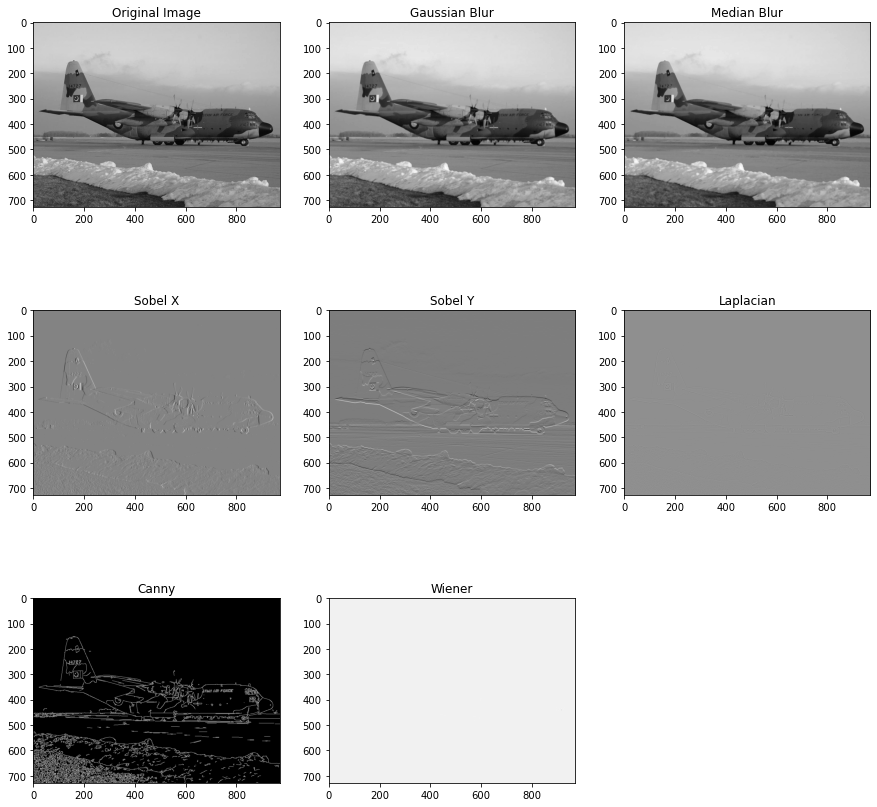

In [11]:
import cv2
import numpy as np
from scipy import ndimage, signal
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('c130.jpg')

# Convert to grayscale for filtering
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#----------------------------------
# Low-Pass Filters (LPF)
#----------------------------------

# 1. Gaussian Blur: Smooths image, reduces high-frequency noise
blurred_image_gaussian = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Kernel size (5, 5)

# 2. Median Filter: Replaces each pixel with the median of its neighboring pixels, effective for salt-and-pepper noise
blurred_image_median = cv2.medianBlur(gray_image, 5)  # Kernel size 5

#----------------------------------
# High-Pass Filters (HPF)
#----------------------------------

# 1. Sobel Edge Detection: Detects edges in horizontal and vertical directions
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges

# 2. Laplacian Edge Detection: Emphasizes edges and zero-crossings
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# 3. Canny Edge Detection: Multi-stage edge detector for robust edge detection
canny = cv2.Canny(gray_image, 100, 200)  # Thresholds for edge detection

#----------------------------------
# Wiener Filter: Reduces noise while preserving edges
#----------------------------------

wiener_image = signal.wiener(gray_image, mysize=5)  # Kernel size 5

#----------------------------------
# Display the original and filtered images
#----------------------------------

plt.figure(figsize=(15, 15))

plt.subplot(331), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
plt.subplot(332), plt.imshow(blurred_image_gaussian, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(333), plt.imshow(blurred_image_median, cmap='gray'), plt.title('Median Blur')
plt.subplot(334), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(335), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.subplot(336), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(337), plt.imshow(canny, cmap='gray'), plt.title('Canny')
plt.subplot(338), plt.imshow(wiener_image, cmap='gray'), plt.title('Wiener')

plt.show()


In [ ]:
# Let's correct the wavelet denoising part of the code.
import skimage
# Perform a multi-level wavelet decomposition
coeffs = pywt.wavedec2(gray_image, 'db1', level=2)

# Set the threshold for filtering
threshold = 20

# Process coefficients
coeffs_thresh = coeffs[:]
for i in range(1, len(coeffs_thresh)):
    coeffs_thresh[i] = tuple(pywt.threshold(v, value=threshold, mode='soft') for v in coeffs[i])

# Reconstruct the image from the thresholded coefficients
denoised_image_wavelet = pywt.waverec2(coeffs_thresh, 'db1')

# Make sure the wavelet denoised image is in the correct byte and type range.
denoised_image_wavelet = np.clip(denoised_image_wavelet, 0, 255)
denoised_image_wavelet = denoised_image_wavelet.astype('uint8')

# Apply Anisotropic Diffusion (Perona-Malik filter)
# Note: We convert the image from 0-255 range to 0-1 float range as required by the function
denoised_image_aniso = skimage.restoration.denoise_bilateral(original_image/255, sigma_color=0.05, sigma_spatial=15, multichannel=True)

# Apply Non-Local Means Denoising
denoised_image_nlmeans = cv2.fastNlMeansDenoisingColored(original_image, None, 10, 10, 7, 21)

# Display the original and denoised images using matplotlib
plt.figure(figsize=(20, 10))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display Wavelet Denoised Image
plt.subplot(1, 4, 2)
plt.imshow(denoised_image_wavelet, cmap='gray')
plt.title('Wavelet Denoised Image')
plt.axis('off')

# Display Anisotropic Diffusion Denoised Image
plt.subplot(1, 4, 3)
# We need to convert the image from 0-1 range back to 0-255 uint8 range for display
plt.imshow(cv2.convertScaleAbs(denoised_image_aniso, alpha=(255.0)))
plt.title('Anisotropic Diffusion Denoised Image')
plt.axis('off')

# Display Non-Local Means Denoised Image
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(denoised_image_nlmeans, cv2.COLOR_BGR2RGB))
plt.title('Non-Local Means Denoised Image')
plt.axis('off')

# Show the images
plt.show()


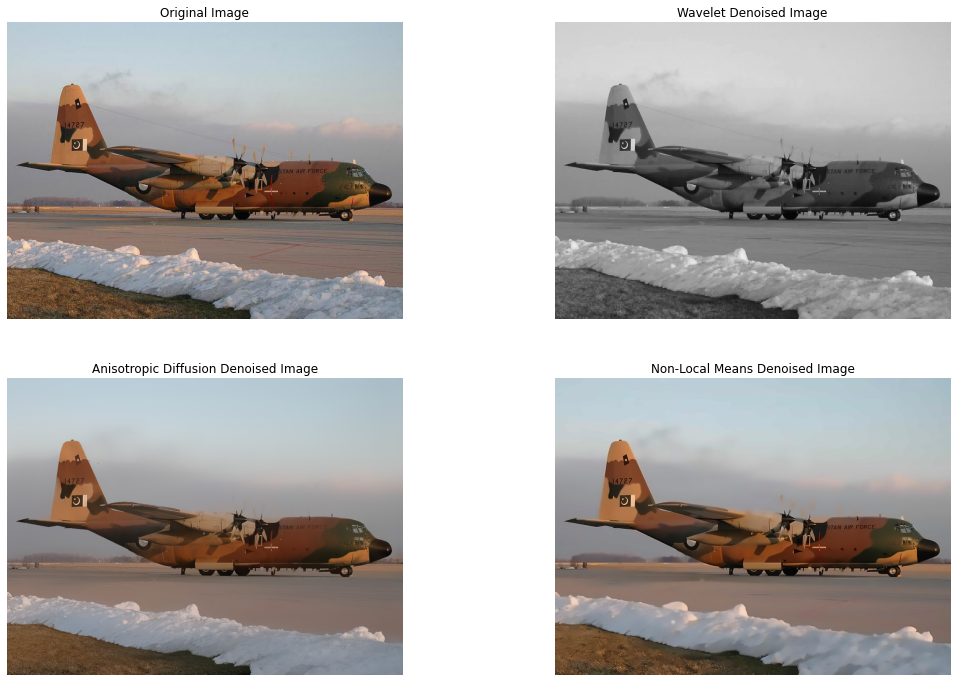

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import skimage.restoration

# Load the original image
original_image = cv2.imread('c130.jpg')

# Convert the original image to float32 type needed for some of the denoising functions
image_float = np.float32(original_image) / 255.0  # Normalize the image to the range [0, 1]

# Wavelet Transform for denoising
# Convert the image to grayscale as PyWavelets works with 2 dimensions for this example
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# Perform a multi-level wavelet decomposition
coeffs = pywt.wavedec2(gray_image, 'db1', level=2)
# Set the threshold for filtering
threshold = 20
# Process coefficients at each decomposition level
coeffs_thresh = [coeffs[0]] + [tuple(pywt.threshold(detail, value=threshold, mode='soft') for detail in details) for details in coeffs[1:]]
# Reconstruct the image from the thresholded coefficients
denoised_image_wavelet = pywt.waverec2(coeffs_thresh, 'db1')
# Convert to uint8
denoised_image_wavelet = np.clip(denoised_image_wavelet, 0, 255).astype(np.uint8)

# Anisotropic Diffusion (Perona-Malik filter)
denoised_image_aniso = skimage.restoration.denoise_bilateral(image_float, sigma_color=0.05, sigma_spatial=15, multichannel=True)
# Convert the result to uint8 for display
denoised_image_aniso = (denoised_image_aniso * 255).astype(np.uint8)

# Non-Local Means Denoising
# OpenCV's fastNlMeansDenoisingColored function expects a uint8 image
denoised_image_nlmeans = cv2.fastNlMeansDenoisingColored(original_image, None, 10, 10, 7, 21)

# Display the original and denoised images
plt.figure(figsize=(18, 12))

# Display original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display Wavelet Denoised Image
plt.subplot(2, 2, 2)
plt.imshow(denoised_image_wavelet, cmap='gray')
plt.title('Wavelet Denoised Image')
plt.axis('off')

# Display Anisotropic Diffusion Denoised Image
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(denoised_image_aniso, cv2.COLOR_BGR2RGB))
plt.title('Anisotropic Diffusion Denoised Image')
plt.axis('off')

# Display Non-Local Means Denoised Image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(denoised_image_nlmeans, cv2.COLOR_BGR2RGB))
plt.title('Non-Local Means Denoised Image')
plt.axis('off')

# Show the images
plt.show()


This code will load an image and apply three different denoising algorithms to it. The first method uses wavelet transforms to denoise the image in the wavelet domain. The second uses anisotropic diffusion to reduce noise while preserving edges, which is achieved by the `denoise_bilateral` function that works similarly to the Perona-Malik filter. The third method uses the Non-Local Means algorithm to denoise the image by averaging similar patches within a larger neighborhood, which helps in preserving the structure of the image while reducing noise.



# Spectral Subtraction:
Commonly used in audio processing; involves subtracting an estimate of the noise spectrum from the spectrum of the noisy signal.
Custom implementation using libraries like NumPy for spectral analysis
* Adaptive Filtering:

Filters that adjust their parameters according to the changing characteristics of the signal.
scipy.signal.lfilter() for implementing custom adaptive filters
* Spatial Filtering:

Techniques like Adaptive Median Filter which adapt the size of the filtering mask based on local variance.
Custom implementation using NumPy or OpenCV
* Dictionary Learning:

Sparse representations of images where the image is represented as a sparse linear combination of basis functions.

sklearn.decomposition.MiniBatchDictionaryLearning in scikit-learn

In [3]:
import cv2
import numpy as np

def adaptive_median_filter(image_path, max_kernel_size=7):
    # Read the image
    image = cv2.imread(image_path, 0)  # 0 converts it to grayscale

    # Median filter start and end sizes
    start_size = 3
    end_size = max_kernel_size
    
    # Placeholder for the filtered image
    filtered_image = np.zeros_like(image)
    
    # Iterate over each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Initialize kernel size
            ksize = start_size
            
            while True:
                # Define the kernel boundaries
                kernel_boundary = ksize // 2
                
                # Extract the region of interest
                roi = image[max(i-kernel_boundary, 0):min(i+kernel_boundary+1, image.shape[0]),
                            max(j-kernel_boundary, 0):min(j+kernel_boundary+1, image.shape[1])]
                
                # Flatten the ROI for easier computation of median
                roi_flat = roi.flatten()
                
                # Calculate the median
                median = np.median(roi_flat)
                
                # Check local neighborhood
                if roi_flat.size % 2 == 1:
                    zxy = roi_flat[roi_flat.size // 2]
                else:
                    zxy = image[i, j]  # central value in case of even number of pixels
                
                # Check conditions to decide if median is good or if we should increase the kernel size
                if start_size == ksize or (zxy > np.min(roi_flat) and zxy < np.max(roi_flat)):
                    # Accept median as new pixel value
                    filtered_image[i, j] = median
                    break
                else:
                    # Increase kernel size
                    ksize += 2
                    if ksize > end_size:  # Check if kernel size exceeds max limit
                        # Set to original value if all fails
                        filtered_image[i, j] = zxy
                        break
    
    return filtered_image

# Apply the adaptive median filter to the image
filtered_image = adaptive_median_filter('c130.jpg')

# Save or display the filtered image as required
# cv2.imwrite('filtered_c130.jpg', filtered_image)


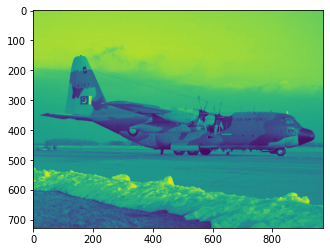

In [6]:
plt.imshow(filtered_image)

Extracting reference patches...
Learning the dictionary...


/home/arsalan/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_dict_learning.py:2351: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(


Transforming patches...
Reconstructing the image...


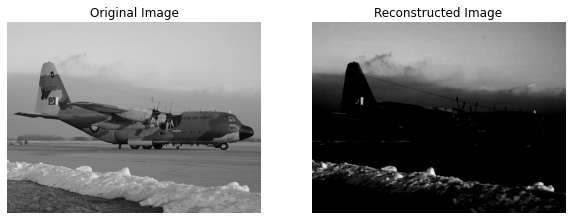

In [8]:
import cv2
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from sklearn.decomposition import MiniBatchDictionaryLearning
import matplotlib.pyplot as plt

def dictionary_learning(image_path, n_components=100, patch_size=(7, 7)):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Extract patches from the image
    print("Extracting reference patches...")
    patches = extract_patches_2d(image, patch_size)
    patches = patches.reshape(patches.shape[0], -1)
    
    # Convert patches to float for processing
    patches = patches.astype(np.float64)
    
    # Remove the mean 'color' from each patch (optional)
    patches -= np.mean(patches, axis=0)
    
    # Perform the dictionary learning
    print("Learning the dictionary...")
    dico = MiniBatchDictionaryLearning(n_components=n_components, alpha=1, n_iter=500)
    V = dico.fit(patches).components_
    
    # Transform the patches to get the sparse codes
    print("Transforming patches...")
    code = dico.transform(patches)
    
    # Reconstruct the image from the codes and dictionary
    print("Reconstructing the image...")
    patches_reconstructed = np.dot(code, V)
    
    # Add back the mean 'color'
    patches_reconstructed += np.mean(patches, axis=0)
    
    # Reshape to the original patch size
    patches_reconstructed = patches_reconstructed.reshape(len(patches), *patch_size)
    
    # Reconstruct the image from patches
    reconstructed_image = reconstruct_from_patches_2d(patches_reconstructed, image.shape)
    
    # Ensure the pixel values are within the 0-255 range and convert back to uint8
    reconstructed_image = np.clip(reconstructed_image, 0, 255)
    reconstructed_image = reconstructed_image.astype(np.uint8)
    
    # Display the original and reconstructed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    plt.show()
    
    return reconstructed_image

# Replace 'image_path.jpg' with the path to your image file.
reconstructed_image = dictionary_learning('c130.jpg')




### Explanation of the Code

**Spatial Filtering Code Explanation**: The `adaptive_median_filter` function reads a grayscale image and initializes kernel sizes. It then iterates over each pixel, adjusting the size of the kernel based on whether the current pixel's value is an outlier when compared to the median of its local neighborhood. If the pixel's value is not an outlier, it is replaced with the median value. Otherwise, the kernel size is increased. If the kernel size reaches the maximum without finding a suitable median, the pixel's value is left unchanged.

**Dictionary Learning Code Explanation**: The `dictionary_learning` function applies dictionary learning to an image. It first reads the image in grayscale, then extracts overlapping patches. It then removes the mean color of each patch to normalize them. `MiniBatchDictionaryLearning` is used to learn a dictionary of visual words (components) from the patches. The sparse codes for each patch are computed, which are then used to reconstruct the patches. The patches are added back to their mean color and reshaped to their original size. These reconstructed patches are then combined to form the reconstructed image. This process effectively learns the most important features (basis functions) needed to represent the visual data in the image, which can help with tasks such as denoising or compressing the image.

Pleae note that these scripts are meant for educational purposes to demonstrate the concepts. The adaptive median filter script provided is a simplified version and may not perform as efficiently as specialized image processing libraries. The dictionary learning script uses scikit-learn's `MiniBatchDictionaryLearning`, which is suitable for processing small to moderate-sized images due to computational constraints.


1. Loads the image in grayscale.
2. Extracts overlapping patches from the image.
3. Normalizes the patches by subtracting the mean.
4. Applies dictionary learning to learn the basis functions.
5. Reconstructs the image from the learned dictionary and sparse codes.


**Explanation**:

- The image is read in grayscale mode for simplification.
- Overlapping patches are extracted from the image using `extract_patches_2d`.
- These patches are normalized by converting to `float64` and subtracting the mean.
- `MiniBatchDictionaryLearning` is used to learn the dictionary on the normalized patches.
- Sparse codes for the patches are obtained by transforming them with the learned dictionary.
- The image is reconstructed from these sparse codes and the dictionary.
- The reconstructed patches are added back to the mean and reshaped to the original patch size.
- `reconstruct_from_patches_2d` is used to reconstruct the image from the reshaped patches.
- The pixel values are ensured to be within the valid range and converted back to `uint8` for display.
- The original and reconstructed images are displayed side by side for comparison.



# Autoencoders:

Neural networks designed to learn a compact representation of data, can be used for noise reduction.


An autoencoder is a type of neural network that is trained to attempt to copy its input to its output. Internally, it has a hidden layer that describes a code used to represent the input. The network may be viewed as consisting of two parts: an encoder function which converts the input into the code, and a decoder function that converts the code to a reconstruction of the original input.



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load image data (for demonstration, we'll use MNIST dataset)
# (x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
# x_train = x_train.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.astype('float32') / 255.
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add random noise
# noise_factor = 0.5
# x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
# x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the images to ensure the values are between 0 and 1
# x_train_noisy = np.clip(x_train_noisy, 0., 1.)
# x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build the encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Build the decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Full autoencoder
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
# autoencoder.fit(x_train_noisy, x_train,
#                 epochs=100,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test_noisy, x_test))

# After training, the autoencoder can be used to predict on the noisy images
# and hopefully reconstruct the denoised images
# denoised_images = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
# n = 10  # Number of images to display
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     # Display original
#     ax = plt.subplot(3, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # Display noisy images
#     ax = plt.subplot(3, n, i + 1 + n)
#     plt.imshow(x_test_noisy[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # Display denoised images
#     ax = plt.subplot(3, n, i + 1 + 2*n)
#     plt.imshow(denoised_images[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()



Here is the explanation of the code:

- **Import Libraries**: We use TensorFlow and Keras for building and training the neural network. Matplotlib is used for visualization.

- **Load Image Data**: Normally, you'd load your image data here. For this example, the MNIST dataset is used as a placeholder.

- **Preprocessing**: The images from the dataset are converted to floating-point and normalized. They are also flattened to a single vector per image since this example uses a simple fully connected network.

- **Add Noise**: Random noise is added to the images to simulate noisy data. This is what our autoencoder will learn to clean.

- **Clipping**: The pixel values are clipped to ensure they remain between 0 and 1 after adding noise.

- **Encoder**: This part of the network compresses the image into a smaller representation. It has three layers with decreasing numbers of neurons (128, 64, and 32), using ReLU activation functions.

- **Decoder**: The decoder part of the network tries to reconstruct the original image from the compressed representation. It mirrors the encoder with increasing neurons (64, 128, and finally 784 to match the image size), ending with a sigmoid activation function to output values between 0 and 1.

- **Autoencoder**: This is the full model, connecting the encoder and decoder.

- **Compilation**: The autoencoder is compiled with the Adam optimizer and binary crossentropy loss function, which is appropriate for binary image data.

- **Training**: The autoencoder is trained using the noisy images as input and clean images as the output.

- **Prediction**: After training, the autoencoder can be used to clean the noisy images.

- **Display**: The original, noisy, and denoised images are displayed side by side for comparison.



In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2

# Load and preprocess the image
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))  # Resize to the input shape expected by the network
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Define a simple CNN model
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))  # Assuming we have 10 classes
    return model

# Load the image
image_path = '/mnt/data/c130.jpg'
image = load_and_preprocess_image(image_path)

# Display the original and preprocessed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path))  # Show the original image
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image)  # Show the preprocessed image
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

# Define the CNN model
model = define_model()
print(model.summary())


Creating a Convolutional Neural Network (CNN) involves a series of steps: defining the architecture, preprocessing the input data, training the model, and then evaluating the model. 

Now, let's go through the code:

- **TensorFlow and Keras**: We begin by importing TensorFlow, which is an end-to-end open-source platform for machine learning, and Keras, which is a high-level API to build and train models in TensorFlow.

- **Load and Preprocess the Image**: The `load_and_preprocess_image` function reads the image using OpenCV, converts it from BGR to RGB (since Matplotlib and most image processing libraries use RGB), resizes it to the input size expected by the CNN (32x32 pixels in this case), and normalizes the pixel values to the range [0, 1] as neural networks typically perform better with normalized data.

- **CNN Architecture**: The `define_model` function creates a `Sequential` model, which is a linear stack of layers. We add convolutional layers (`Conv2D`) with ReLU activations. These are the core building blocks of CNNs, capable of capturing spatial hierarchies in image data. `MaxPooling2D` layers are used to reduce the spatial dimensions of the output from the convolutional layers. After the convolutional base, we flatten the feature maps to pass them to dense (fully connected) layers, which perform classification based on features extracted by the convolutional layers. The last dense layer has a number of units equal to the number of classes in the classification task.

- **Displaying Images**: We use Matplotlib to display the original and preprocessed images side by side for comparison.

- **Model Summary**: Finally, we print out the summary of the model to see the details of the architecture, including the number of parameters and the shapes of the outputs at each layer.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10) # Assuming we have 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 4 * 4)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load and preprocess the image
def load_and_preprocess_image(path):
    image = Image.open(path)
    preprocess = transforms.Compose([
        transforms.Resize(32),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image).unsqueeze(0)  # Add a batch dimension
    return image

# Instantiate the model
model = SimpleCNN()

# Load the image
image_path = 'c130.jpg'
image = load_and_preprocess_image(image_path)

# Display the original and preprocessed images
original_image = Image.open(image_path)
preprocessed_image = image.squeeze(0).permute(1, 2, 0)  # Remove batch dimension and convert to HxWxC format

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image)  # Show the original image
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image.numpy())  # Convert tensor to numpy array and show the preprocessed image
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

# Print the model's architecture
print(model)


Creating a Convolutional Neural Network (CNN) using PyTorch involves defining the network architecture, preprocessing the input data, and optionally training and evaluating the model. 


This code is structured in the following way:

- **PyTorch Libraries**: We import the necessary modules from PyTorch (`torch`, `torch.nn`, and `torch.nn.functional`) to define the neural network layers and functions. `transforms` from `torchvision` is used to preprocess images, and `PIL.Image` is used to handle image files.

- **CNN Architecture**: The `SimpleCNN` class defines a simple CNN architecture. It inherits from `nn.Module`, which is a base class for all neural network modules in PyTorch. The `__init__` method initializes the layers such as convolutional layers (`nn.Conv2d`), pooling layers (`nn.MaxPool2d`), and fully connected layers (`nn.Linear`). The `forward` method defines the forward pass of the network, specifying how the data flows through the network.

- **Image Preprocessing**: The `load_and_preprocess_image` function uses the `transforms` module to resize and normalize the image. It converts the PIL image to a PyTorch tensor, normalizes it with the mean and standard deviation of the ImageNet dataset (a common practice), and adds a batch dimension to simulate the input that a model would expect during training.

- **Model Initialization**: An instance of the `SimpleCNN` model is created.

- **Image Display**: The original and preprocessed images are displayed side by side using `matplotlib.pyplot`.

- **Model Summary**: The architecture of the model is printed out, showing the layers and their configurations.



# Generative Adversarial Networks (GANs):

Can be trained to generate clean images from noisy inputs.
TensorFlow, PyTorch libraries for implementation

Creating a Generative Adversarial Network (GAN) from scratch is a complex process that involves defining and training two neural networks: the Generator and the Discriminator. The Generator learns to create images that look similar to a training dataset, while the Discriminator learns to distinguish between the generated images and real images. Training a GAN requires a significant amount of data and computational resources, and it typically takes hours or days, depending on the complexity of the data and the architecture of the neural networks.

Moreover, a GAN that is trained to generate clean images from noisy inputs is even more specialized and would be trained on a dataset consisting of pairs of noisy and clean images. This type of GAN is often referred to as a denoising GAN.



Here's a high-level description of what the code would involve:

1. **Import Libraries**: Import PyTorch libraries and other necessary packages.
2. **Define the Discriminator**: A neural network that classifies images as real or fake.
3. **Define the Generator**: A neural network that generates images from random noise.
4. **Loss Functions**: Define loss functions for training the networks.
5. **Optimizers**: Set up optimizers for updating network weights.
6. **Training Loop**: Implement the training loop, where the Generator and Discriminator are trained alternately.




In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the input shape and the size of the noise vector
img_rows, img_cols, channels = 64, 64, 3  # Example size, adjust to your dataset
img_shape = (img_rows, img_cols, channels)
latent_dim = 100

# Build the Generator
def build_generator():
    noise_shape = (latent_dim,)
    
    # Sequential API is not used to explain the step by step process
    noise = Input(shape=noise_shape)
    x = Dense(256, input_dim=latent_dim)(noise)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(1024)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(np.prod(img_shape), activation='tanh')(x)
    img = Reshape(img_shape)(x)
    
    model = Model(inputs=noise, outputs=img)
    return model

# Build the Discriminator
def build_discriminator():
    img = Input(shape=img_shape)
    x = Flatten()(img)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    validity = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=img, outputs=validity)
    return model

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
valid = discriminator(img)

# The combined model (stacked generator and discriminator)
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
def train(epochs, batch_size=128, save_interval=50):
    # Load the dataset (This is just a placeholder, you need to implement the loading)
    X_train = None  # TODO: Load your dataset here
    
    # Rescale -1 to 1 (Preprocessing)
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)
    
    half_batch = batch_size // 2
    
    for epoch in range(epochs):
        
        # ---------------------
        #  Train Discriminator
        # ---------------------
        
        # Select a random half batch of images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]
        
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        gen_imgs = generator.predict(noise)
        
        # Train the discriminator (real classified as ones and generated as zeros)
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # ---------------------
        #  Train Generator
        # ---------------------
        
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        
        # The generator wants the discriminator to label the generated samples as valid (ones)
        valid_y = np.array([1] * batch_size)
        
        # Train the generator
        g_loss = combined.train_on_batch(noise, valid_y)
        
        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [D acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

# Set parameters and train
train(epochs=10000, batch_size=32, save_interval=1000)





### Explanation

- **Imports**: We import TensorFlow and specifically Keras, which is a high-level neural networks API, now integrated within TensorFlow.

- **Model Definitions**: We define two functions, `build_generator()` and `build_discriminator()`, which set up the architecture for the Generator and Discriminator models, respectively.

- **Generator Architecture**: The generator starts with a noise vector and uses dense (fully connected) layers with LeakyReLU activations and batch normalization to produce an image matching the dimensions of the training data.

- **Discriminator Architecture**: The discriminator takes an image as input and uses dense layers with LeakyReLU activations to output a single value representing whether it believes the image is real or fake.

- **Model Compilation**: The discriminator is compiled with the binary crossentropy loss function and the Adam optimizer. The combined model stacks the generator and discriminator and also uses binary crossentropy, but here we set the discriminator to non-trainable because we want to train only the generator when using this model.

- **Training Loop**: The `train()` function orchestrates the training process, alternating between training the discriminator and the generator. It uses batches of real images and batches of noise to generate fake images.

- **Preprocessing**: Images are scaled to a range of -1 to 1, which typically helps the GAN to converge.

- **Training Discriminator**: Real images are labeled with ones and fake images with zeros. The discriminator's weights are updated to get better at distinguishing real and fake images.

- **Training Generator**: Noise vectors are labeled with ones because the generator's goal is to fool the discriminator into thinking the generated images are real.

- **Saving Intervals**: At certain intervals, you would save the generator's output to monitor progress. This step is represented by a print statement for simplicity.



# Total Variation Denoising:
Reduces noise by penalizing large gradients in the image leading to smoother images with preserved edges.
skimage.restoration.denoise_tv_chambolle() in scikit-image
# Bilateral Filtering:
A non-linear, edge-preserving, and noise-reducing smoothing filter for images.
cv2.bilateralFilter(), skimage.restoration.denoise_bilateral()
# Fourier Transform:
Noise reduction in the frequency domain by filtering specific frequencies.
numpy.fft.fft2(), numpy.fft.ifft2() for applying and reversing Fourier Transform
# Morphological Filtering:
Involves operations like erosion and dilation for noise removal, particularly useful for binary images.
cv2.erode(), cv2.dilate(), cv2.morphologyEx() in OpenCV

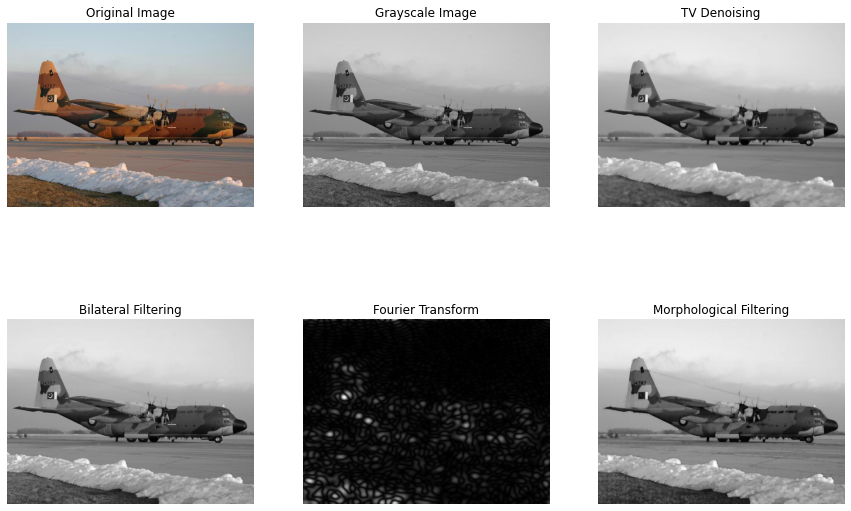

In [10]:
from skimage import restoration, color, img_as_float
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and convert it to grayscale
original_image = cv2.imread('c130.jpg')
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
float_gray = img_as_float(gray_image)  # Convert to float for denoising functions

# Total Variation Denoising
tv_denoised = restoration.denoise_tv_chambolle(float_gray, weight=0.1)

# Bilateral Filtering
bilateral_denoised = cv2.bilateralFilter(gray_image, d=5, sigmaColor=75, sigmaSpace=75)

# Fourier Transform for noise reduction
# Convert to frequency domain
f_transform = np.fft.fft2(float_gray)
# Create a mask that will be used for filtering
rows, cols = float_gray.shape
crow, ccol = rows // 2, cols // 2
# Remove frequencies outside a certain radius
radius = 30
mask = np.zeros((rows, cols), np.uint8)
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius**2
mask[mask_area] = 1
# Apply the mask and inverse FFT
f_transform = f_transform * mask
f_ishift = np.fft.ifft2(f_transform)
fourier_denoised = np.abs(f_ishift)

# Morphological Filtering - using erosion followed by dilation
kernel = np.ones((5, 5), np.uint8)
morpho_denoised = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

# Display all the images
plt.figure(figsize=(15, 10))

plt.subplot(231), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(232), plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image'), plt.axis('off')

plt.subplot(233), plt.imshow(tv_denoised, cmap='gray')
plt.title('TV Denoising'), plt.axis('off')

plt.subplot(234), plt.imshow(bilateral_denoised, cmap='gray')
plt.title('Bilateral Filtering'), plt.axis('off')

plt.subplot(235), plt.imshow(fourier_denoised, cmap='gray')
plt.title('Fourier Transform'), plt.axis('off')

plt.subplot(236), plt.imshow(morpho_denoised, cmap='gray')
plt.title('Morphological Filtering'), plt.axis('off')

plt.show()


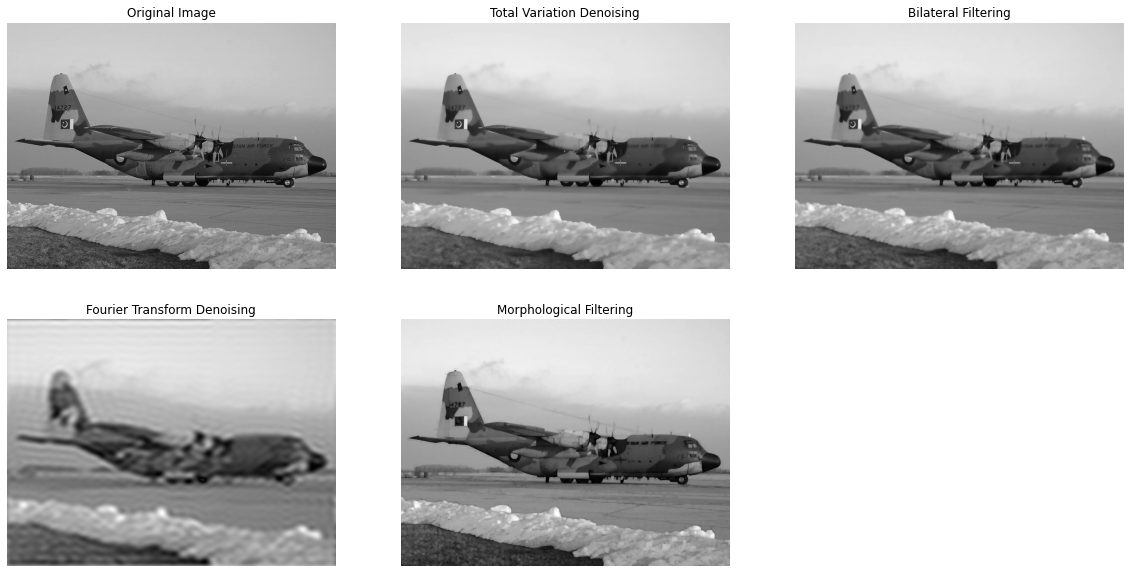

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
from scipy.ndimage import fourier_gaussian

# Read the image
image = cv2.imread('c130.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found or the path is incorrect")

# Normalize the image
image_normalized = image / 255.0

# Apply Total Variation Denoising
tv_denoised = restoration.denoise_tv_chambolle(image_normalized, weight=0.1)

# Apply Bilateral Filtering
bilateral_denoised = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply Fourier Transform and Inverse Fourier Transform for noise reduction
f = np.fft.fft2(image_normalized)
fshift = np.fft.fftshift(f)
# Creating a Gaussian mask
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Apply Morphological Filtering
kernel = np.ones((5,5),np.uint8)
morphology_denoised = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Display the original and filtered images
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(231), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')

# Total Variation Denoising
plt.subplot(232), plt.imshow(tv_denoised, cmap='gray')
plt.title('Total Variation Denoising'), plt.axis('off')

# Bilateral Filtering
plt.subplot(233), plt.imshow(bilateral_denoised, cmap='gray')
plt.title('Bilateral Filtering'), plt.axis('off')

# Fourier Transform Denoising
plt.subplot(234), plt.imshow(img_back, cmap='gray')
plt.title('Fourier Transform Denoising'), plt.axis('off')

# Morphological Filtering
plt.subplot(235), plt.imshow(morphology_denoised, cmap='gray')
plt.title('Morphological Filtering'), plt.axis('off')

plt.show()


The code  applies several noise reduction and smoothing techniques to the grayscale version of the image, showcasing how each method affects the visual quality. Here's an explanation of the steps taken in the code:

1. **Import Libraries**: The code begins by importing the necessary libraries. `cv2` is OpenCV, used for image processing; `numpy` is used for numerical operations; `matplotlib.pyplot` is used for displaying images; `restoration` from `skimage` includes denoising algorithms; and `fourier_gaussian` from `scipy.ndimage` applies a Gaussian filter in the Fourier domain.

2. **Reading the Image**: The image is read in grayscale mode using `cv2.imread()`. The grayscale version is used because some of the denoising functions work on single-channel images.

3. **Normalize the Image**: Before applying the denoising functions, the image pixel values are normalized to the range [0, 1] by dividing by 255. This is a common practice as some algorithms expect the input data to be in this range.

4. **Total Variation Denoising**: This technique, implemented via `restoration.denoise_tv_chambolle()`, reduces noise by penalizing large gradients in the image, leading to a smoother image while preserving edges. The `weight` parameter controls the strength of the denoising.

5. **Bilateral Filtering**: The `cv2.bilateralFilter()` applies a non-linear, edge-preserving, and noise-reducing filter. The parameters `d`, `sigmaColor`, and `sigmaSpace` define the diameter of the pixel neighborhood, the filter sigma in the color space, and the filter sigma in the coordinate space, respectively.

6. **Fourier Transform for Noise Reduction**: Here, the code performs a Fourier transform using `np.fft.fft2()`, shifts the zero-frequency component to the center with `np.fft.fftshift()`, applies a Gaussian mask to keep low frequencies and discard high frequencies, and then applies an inverse Fourier transform using `np.fft.ifft2()`. The result is a frequency-domain denoising that tends to blur the image.

7. **Morphological Filtering**: Morphological operations are applied using `cv2.morphologyEx()` with an opening operation, which is an erosion followed by a dilation. This is particularly useful for removing small bits of noise and smooth out the image.

8. **Displaying the Images**: `matplotlib.pyplot` is used to display the original and processed images. Each subplot shows one of the images with their corresponding titles.

In the output, you can observe the following:

- The **Original Image** is the grayscale version of the uploaded image.
- **Total Variation Denoising** shows a smoother image where noise is reduced, and important edges are preserved.
- **Bilateral Filtering** also provides a noise-reduced image with edges preserved, but with a different texture due to the nature of bilateral filtering.
- **Fourier Transform Denoising** shows the image with high-frequency noise reduced, which might cause some blurring.
- **Morphological Filtering** shows the result of the morphological opening operation, which can clean up small specks of noise but also blurs and distorts the image slightly.

Each method has its use cases and works differently depending on the image content and the type of noise present. The code demonstrates how each method can be applied and visualized to help in choosing the best approach for specific image denoising tasks.